# Gradient of Image

## import library

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [3]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [40]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++
print(I0)
print(I0.shape)
print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

[[[192  97  53]
  [183  87  45]
  [189  94  48]
  ...
  [142 194  84]
  [111 195  84]
  [  1   0   8]]

 [[190  94  52]
  [190  95  51]
  [180  84  42]
  ...
  [142 195  81]
  [116 199  85]
  [  0   0   4]]

 [[179  86  43]
  [191  98  55]
  [179  87  40]
  ...
  [152 202  87]
  [115 195  80]
  [  3   1   4]]

 ...

 [[134 139  55]
  [129 141  55]
  [136 145  66]
  ...
  [168 198 164]
  [202 212 178]
  [  3   5  17]]

 [[133 131  46]
  [137 140  59]
  [123 133  47]
  ...
  [183 214 172]
  [194 187 141]
  [  0   1   0]]

 [[135 125  38]
  [131 124  54]
  [122 134  32]
  ...
  [173 203 165]
  [193 172 129]
  [  2   1   0]]]
(510, 512, 3)
number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [41]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = np.mean(I0, axis=2)
    
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++
print(I0.shape)
print(I)
print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

(510, 512, 3)
[[114.         105.         110.33333333 ... 140.         130.
    3.        ]
 [112.         112.         102.         ... 139.33333333 133.33333333
    1.33333333]
 [102.66666667 114.66666667 102.         ... 147.         130.
    2.66666667]
 ...
 [109.33333333 108.33333333 115.66666667 ... 176.66666667 197.33333333
    8.33333333]
 [103.33333333 112.         101.         ... 189.66666667 174.
    0.33333333]
 [ 99.33333333 103.          96.         ... 180.33333333 164.66666667
    1.        ]]
number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [42]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# 수식: (data- np.min(data)) / (np.max(data) - np.min(data))

I = (I.data - np.min(I.data)) / (np.max(I.data)-np.min(I.data))

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++
print(I)
print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

[[0.44764398 0.41230366 0.43324607 ... 0.54973822 0.5104712  0.0117801 ]
 [0.43979058 0.43979058 0.40052356 ... 0.54712042 0.52356021 0.0052356 ]
 [0.40314136 0.45026178 0.40052356 ... 0.57722513 0.5104712  0.0104712 ]
 ...
 [0.42931937 0.42539267 0.45418848 ... 0.69371728 0.77486911 0.03272251]
 [0.40575916 0.43979058 0.39659686 ... 0.7447644  0.68324607 0.0013089 ]
 [0.39005236 0.40445026 0.37696335 ... 0.70811518 0.64659686 0.0039267 ]]
maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [43]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Iroll = np.roll(I, -1, axis=0)
    for k in range(num_column):
        Iroll[num_row-1][k] = Iroll[num_row-2][k]

    for i in range(num_row):
        for j in range(num_column):
            D[i][j]=Iroll[i][j]-I[i][j] 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [44]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Iroll = np.roll(I, 1, 0)
    for k in range(num_column):
        Iroll[0][k] = Iroll[1][k]

    for i in range(num_row):
        for j in range(num_column):
            D[i][j]=Iroll[i][j]-I[i][j] 
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [45]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Irollback = np.roll(I, -1, 0)
    Irollfront = np.roll(I, 1, 0)
    
    for j in range(num_column):
        Irollback[num_row-1][j] = Irollback[num_row-2][j]

    for k in range(num_column):
        Irollfront[0][k] = Irollfront[1][k]

    for i in range(num_row):
        for j in range(num_column):
            D[i][j]=(Irollback[i][j]-Irollfront[i][j])/2 
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [46]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Iroll = np.roll(I, -1, 1)
    for k in range(num_row):
        Iroll[k][num_column-1] = Iroll[k][num_column-2]

    for i in range(num_row):
        for j in range(num_column):
            D[i][j]=Iroll[i][j]-I[i][j] 
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [47]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Iroll = np.roll(I, 1, 1)
    for k in range(num_row):
        Iroll[k][0] = Iroll[k][1]

    for i in range(num_row):
        for j in range(num_column):
            D[i][j]=Iroll[i][j]-I[i][j] 
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [48]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Irollleft = np.roll(I, -1, 1)
    Irollright = np.roll(I, 1, 1)
    
    for j in range(num_row):
        Irollleft[j][num_column-1] = Irollleft[j][num_column-2]

    for k in range(num_row):
        Irollright[k][0] = Irollright[k][1]
    

    for i in range(num_row):
        for j in range(num_column):
            D[i][j]=(Irollleft[i][j]-Irollright[i][j])/2 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [64]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # dx = x_forward, dy = y_forward
    # dx의 제곱 + dy의 제곱
    Irollback = np.roll(I, -1, 0)
    Irollfront = np.roll(I, 1, 0)
    
    for j in range(num_column):
        Irollback[num_row-1][j] = Irollback[num_row-2][j]

    for k in range(num_column):
        Irollfront[0][k] = Irollfront[1][k]
            
    Irollleft = np.roll(I, -1, 1)
    Irollright = np.roll(I, 1, 1)
    
    for j in range(num_row):
        Irollleft[j][num_column-1] = Irollleft[j][num_column-2]

    for k in range(num_row):
        Irollright[k][0] = Irollright[k][1]

    for i in range(num_row):
        for j in range(num_column):
            norm_gradient[i][j]= ((Irollback[i][j]-Irollfront[i][j])*0.5)*((Irollback[i][j]-Irollfront[i][j])*0.5)+((Irollleft[i][j]-Irollright[i][j])*0.5)*((Irollleft[i][j]-Irollright[i][j])*0.5)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [8]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [9]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [10]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [15]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [26]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [32]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [33]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [38]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [65]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [67]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [69]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


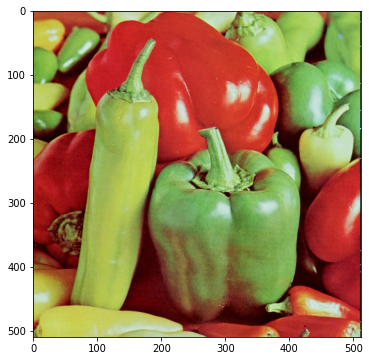

**************************************************
## [RESULT 02]
**************************************************


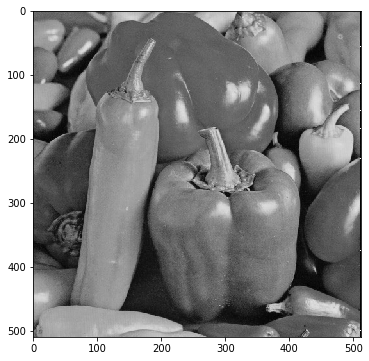

**************************************************
## [RESULT 03]
**************************************************


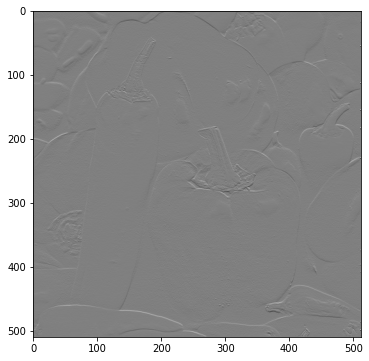

**************************************************
## [RESULT 04]
**************************************************


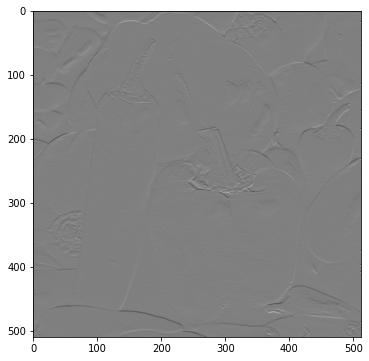

**************************************************
## [RESULT 05]
**************************************************


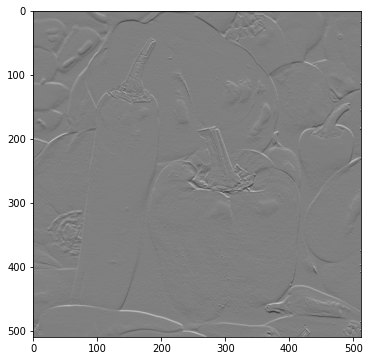

**************************************************
## [RESULT 06]
**************************************************


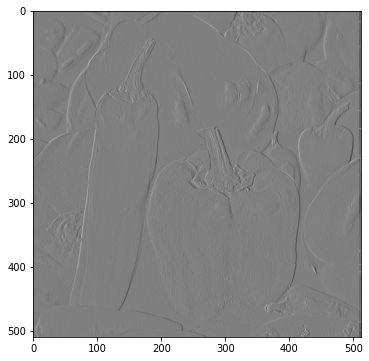

**************************************************
## [RESULT 07]
**************************************************


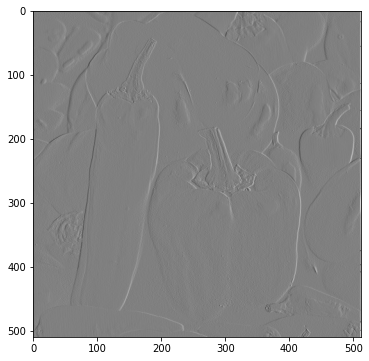

**************************************************
## [RESULT 08]
**************************************************


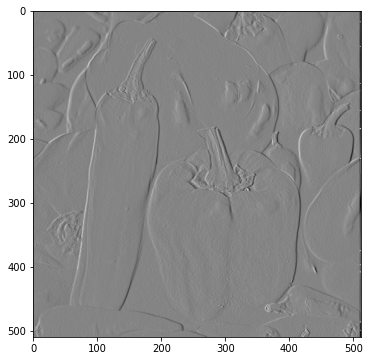

**************************************************
## [RESULT 09]
**************************************************


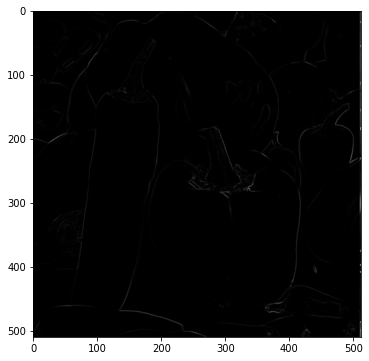

**************************************************
## [RESULT 10]
**************************************************


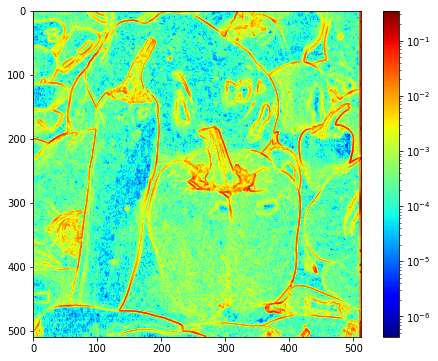

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.007853403141361237
value2 =  0.0
value3 =  -0.005235602094240843
value4 =  0.011780104712041883
**************************************************
## [RESULT 12]
**************************************************


NameError: name 'function_result_12' is not defined

In [70]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)